##### Basic Deeplearning

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
# 위의 구문을 사용하지 않는 경우 tf.keras, tf.keras.layers와 같이 사용가능

In [39]:
x=np.array([1,2,3,4,5,6])
y=np.array([10,98,8,2,3,4])

tf.random.set_seed(2)

input_layer=tf.keras.layers.InputLayer(input_shape=(1,))
# (1,) 이 부분은 Dense의 가장 상단으로 입력되는 x변수의 갯수(독립변수, 특징값갯수)
hidden_layer1=tf.keras.layers.Dense(units=4,activation='relu')
hidden_layer2=tf.keras.layers.Dense(units=3,activation='relu')
output_layer=layers.Dense(units=1)  # unit 생략 가능, activation 없으면 wx+b만 동작 (선형회귀)

# 순차 처리 구조, (함수처리 구조도 있음)
model=keras.Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    output_layer    
])
# 자동으로 wx+b 수행

In [40]:
model.summary()
# x변수 1개 존재 -> w,b값이 들어가서 생성된 것이 2개임 (param)
# param이 8개인 이유 x 변수 하나에 w,b가 생성되므로 dense 4 * 2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 8         
                                                                 
 dense_8 (Dense)             (None, 3)                 15        
                                                                 
 dense_9 (Dense)             (None, 1)                 4         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.get_weights()
# [-0.37941802] : w, [0.] : b

[array([[-0.773598  , -0.07830954, -0.6027144 , -0.32230526]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.2345941 ,  0.9147757 ,  0.03404182],
        [ 0.5407841 ,  0.05537122, -0.70402545],
        [-0.9096717 , -0.5788559 , -0.328     ],
        [ 0.09359658,  0.703648  , -0.38132793]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.05038762],
        [-0.8220296 ],
        [-1.178161  ]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
# model.fit할 때 오차역전파 하는 방법론 (최적화함수 -> optimizer)
# model.fit할 때 구축된 모델에서 계산된 값을 (y예측값) 실제 y값과 비교하는 공식(loss function -> 오차 함수)
# model.fit할 떄 화면에 출력될 사항 선택 (metrics)
model.compile(#optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

hist=model.fit(x,y,epochs=3,verbose=1) # verbose가 0이면 화면 출력x
# hist.history['loss']
list(hist.history)

Epoch 1/3
1/1 [==============================] - 0s 173ms/step - loss: 1706.5474 - accuracy: 0.0000e+00
Epoch 2/3
1/1 [==============================] - 0s 11ms/step - loss: 1706.0323 - accuracy: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 3ms/step - loss: 1705.6592 - accuracy: 0.0000e+00


['loss', 'accuracy']

In [22]:
hist.history['loss'], hist.history['accuracy']

([1706.54736328125, 1706.0323486328125, 1705.6591796875], [0.0, 0.0, 0.0])

Text(0.5, 1.0, 'accuracy')

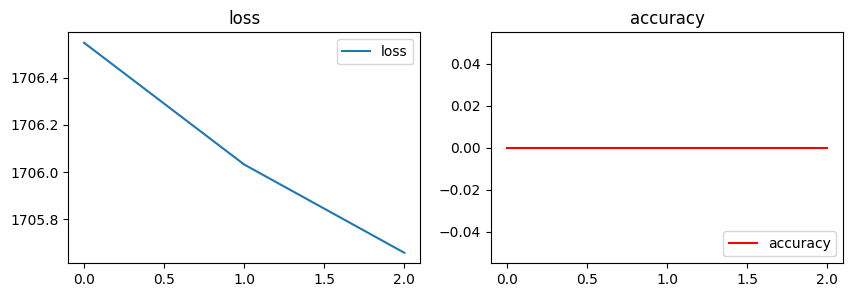

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], label='loss')
plt.legend(loc='upper right')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'r', label='accuracy')
plt.legend(loc='lower right')
plt.title('accuracy')

In [14]:
model.predict(x)

array([[-0.98705286],
       [-2.0922048 ],
       [-3.1973567 ],
       [-4.302509  ],
       [-5.407661  ],
       [-6.5128126 ]], dtype=float32)

In [13]:
model.get_weights()

[array([[-1.105152]], dtype=float32), array([0.11809918], dtype=float32)]